# A Market Basket Analysis: Mall Customers in the U.S.

## Introduction

Several business entities are developing a prominent business strategy to target specific groups of customers and effectively allocate marketing resources. One of such business strategies is customer segmentation, which is the partitions customers into groups of individuals that have similar characteristics. This partitioning helps business target the specific groups of customers and effectively allocate marketing resources. This project develops a customer segmentation model based on unsupervised learning(clustering) for a mall in the U.S. to find the hidden data patterns or structures which can be used to target the right audience and hence increase profit margin. Typically, mall members might contain customers who are high-profit and low-risk, that is, more likely to purchase products or subscribe for a service; another group might include customers from non-profit organizations. The overall goal of this project is to help mall business how it can retain those customers based on machine learning models.
The specific project goals are following -
1. Learn customer segmentation concepts
2. Apply unsupervised machine learning skills/technique
3. Identify customers who are likely to converge
4. Explore marketing strategy from a real-world perspective

In [1]:
## Importing the Required Libraries. This will be updated in the following sections as needed. 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px

In [2]:
#Import dataset
data = pd.read_csv('Mall_Customers.csv')

### Data Exploration
I begin the project by exploring data. This is done by data wrangling (reading in dataset,data types, any missing data, null data, etc.). 

In [3]:
data.head() 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Next session will cover preprocessing and modeling.

## Pre-Processing

In [4]:
#scaling the dataset on the same scale
from sklearn.preprocessing import StandardScaler
df = data.copy() #a copy of the original dataset
df_num = df.select_dtypes(np.number) #selecting column with numerical value (in this case 'Gender')
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num) #calling fit transform on the numerical columns of the data. 
scaled_df = pd.DataFrame(scaled_df, columns= df_num.columns)
scaled_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


In [5]:
# converting the gender column to numerical value for decoding
df['Gender'] = df['Gender'].astype('category').cat.codes

In [6]:
final_df = pd.concat([scaled_df, df['Gender']], axis=1) #rejoin the two separate columns to get a final dataset for further analysis
final_df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.723412,-1.424569,-1.738999,-0.434801,1
1,-1.706091,-1.281035,-1.738999,1.195704,1
2,-1.688771,-1.352802,-1.700830,-1.715913,0
3,-1.671450,-1.137502,-1.700830,1.040418,0
4,-1.654129,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,0
196,1.671450,0.441365,2.497807,-0.861839,0
197,1.688771,-0.491602,2.497807,0.923953,1
198,1.706091,-0.491602,2.917671,-1.250054,1


In [7]:
#Renaming columns and dropping unused column - customerID
final_df.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)

final_df.drop('CustomerID',axis=1,inplace=True)
final_df

,Age,Income,Score,Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


### 1. Clustering with K-Means

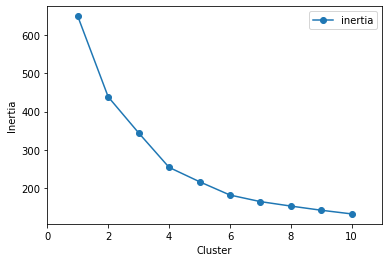

In [8]:
from sklearn.cluster import KMeans

# Create and fit a range of models
km_list = list()

for clust in range(1,11):
    km = KMeans(n_clusters = clust, random_state=42)
    km = km.fit(final_df) #fit the model on the dataset
    
    km_list.append(pd.Series({'clusters': clust, 
                              'inertia': km.inertia_,
                              'model': km}))
    
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters','inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o',ls='-')
ax.set_xticks(range(0,11,2))
ax.set_xlim(0,11) #the limit of the labels on x_axis
ax.set(xlabel='Cluster', ylabel='Inertia');

This suggests k =4

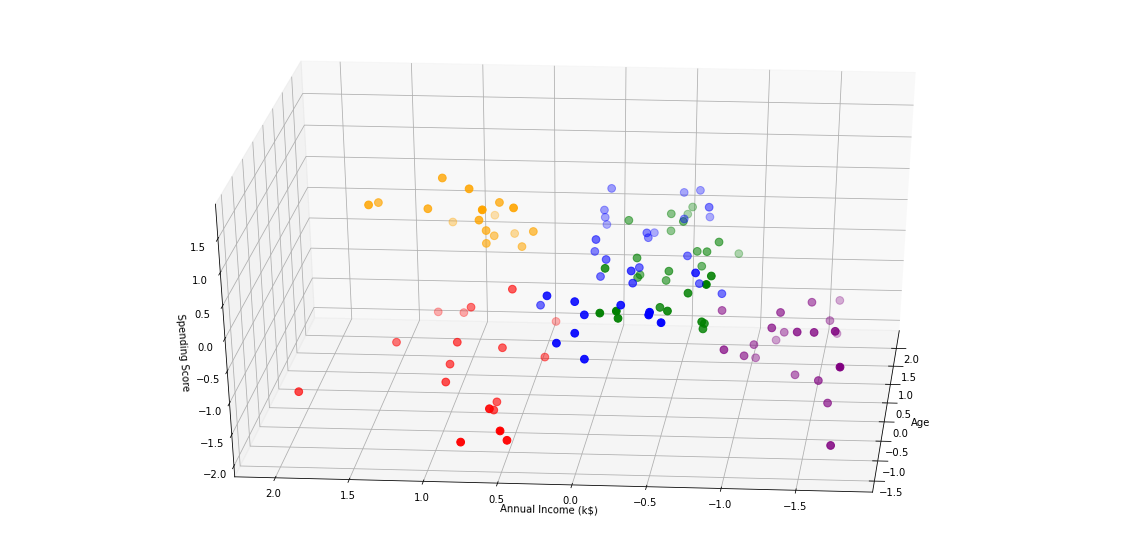

In [10]:
kmeans = KMeans(n_clusters=4)
clusters = km.fit_predict(final_df.iloc[:,1:])
final_df["Group"] = clusters
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_df.Age[final_df.Group == 0], final_df["Income"][final_df.Group == 0], final_df["Score"][final_df.Group == 0], c='blue', s=60)
ax.scatter(final_df.Age[final_df.Group == 1], final_df["Income"][final_df.Group == 1], final_df["Score"][final_df.Group == 1], c='red', s=60)
ax.scatter(final_df.Age[final_df.Group == 2], final_df["Income"][final_df.Group == 2], final_df["Score"][final_df.Group == 2], c='green', s=60)
ax.scatter(final_df.Age[final_df.Group == 3], final_df["Income"][final_df.Group == 3], final_df["Score"][final_df.Group == 3], c='orange', s=60)
ax.scatter(final_df.Age[final_df.Group == 4], final_df["Income"][final_df.Group == 4], final_df["Score"][final_df.Group == 4], c='purple', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score')
plt.show()

### 2. Clustering with Dendogram

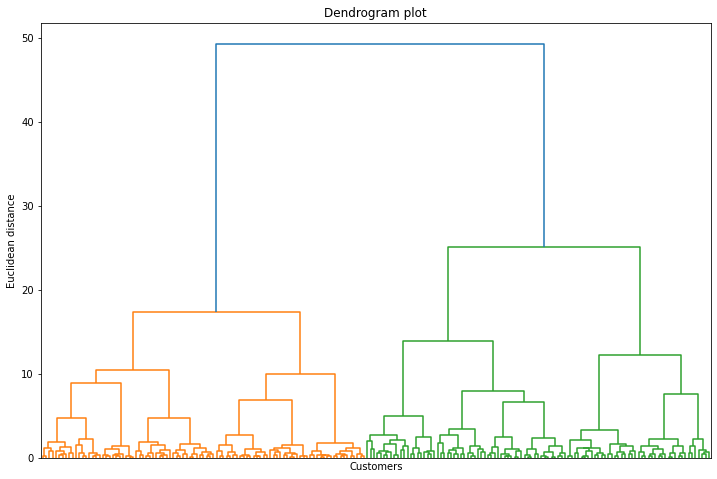

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(12,8))
dend_fig = dendrogram(linkage(final_df, method='ward', optimal_ordering= True))
plt.title('Dendrogram plot')
plt.xlabel('Customers')
plt.xticks([])
plt.ylabel('Euclidean distance')
plt.show()

A dendrogram is a branching plot that shows the represents similarity among a group of entities.Dendrograms can also show the optimal number of clusters to be chosen. The plot suggests that a number of clusters equal to 3-5 is optimal.

### KMeans Modeling with K=4

In [12]:
# final model with k=4
kmeans = KMeans(n_clusters = 4, max_iter = 100, random_state = 42)
kmeans.fit(final_df) #fit the model w

KMeans(max_iter=100, n_clusters=4, random_state=42)

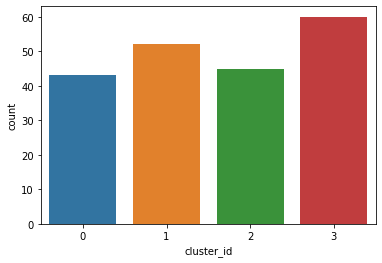

In [13]:
# Visualize the number of customers in each cluster.
df['cluster_id'] = kmeans.labels_
sns.countplot(df['cluster_id']) 

#### Visualizing Distribution of Age, Income, and Score in Each Cluster

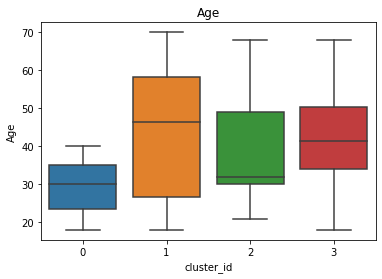

In [14]:
# Age of each cluster
plt.title('Age')
sns.boxplot(x='cluster_id', y='Age', data = df)
plt.show()

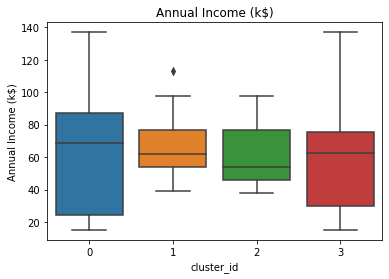

In [15]:
# Annual income of each cluster
plt.title('Annual Income (k$)')
sns.boxplot(x='cluster_id', y='Annual Income (k$)', data = df)
plt.show()

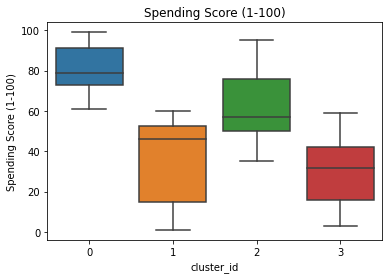

In [16]:
# Spending score of each cluster
plt.title('Spending Score (1-100)')
sns.boxplot(x='cluster_id', y='Spending Score (1-100)', data= df)
plt.show()

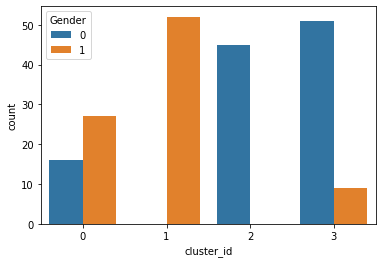

In [18]:
#Gender distribution in each cluster
sns.countplot(data = df , hue ='Gender', x ='cluster_id')

#### Spending Score vs Annual Income of Each Cluster

In [29]:
fig = px.scatter(df, x ="Spending Score (1-100)", y ="Annual Income (k$)", color = 'cluster_id')
fig.show()

#### Annual Income vs Age of Each Cluster

In [20]:
fig = px.scatter(df, x = "Annual Income (k$)", y ="Age", color ="cluster_id") 
fig.show()

#### Annual Income vs Spending Score of Each Cluster

In [21]:
fig = px.scatter(df, x ="Spending Score (1-100)", y ="Annual Income (k$)", color ="cluster_id")
fig.show()

In [30]:
grouped = df.groupby('cluster_id') #group the dataframe by clusterid

grouped['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean().sort_values(
        by = ['Age', 'Annual Income (k$)','Spending Score (1-100)'],ascending=[True, True, True])

<ipython-input-30-3bb83f81e80d>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Age,Annual Income (k$),Spending Score (1-100)
cluster_id,,,
0,29.581395,58.930233,81.232558
2,38.355556,59.800000,62.533333
3,41.866667,58.850000,30.166667
1,43.461538,64.538462,36.980769


## Conclusions

Overall, KMeans clustering shows that the mall customes can be clustered into six distinctive groups. Group 0 represents the youngest group of customers with low income level but the highest spending score. This could be one of the target group. Group 1 is a mid-aged group of customers with the highest income among the groups and relatively low in spending score. Group 2 is also a mid aged group of customers with second highest income and relatively high spending score. Finally, Group 3 represents mid aged customers with both low income and low spending score. 
In conclusion, utilizing Kmeans clustering, we were able to cluster the mall customers into several groups based on their behavior on spending, income, age, and gender. 